enegy of particle:5561.275keV


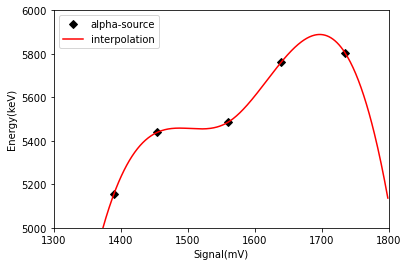

In [2]:
import numpy as np
import matplotlib.pylab as pl
import scipy.interpolate as sp

energy_alpha_source=np.zeros(5,dtype=float)
signal_alpha_source=np.zeros(5,dtype=float)

with open('calibrate.dat','r') as fin:
    i = 0
    for lines in fin:
        words=lines.split()
        energy_alpha_source[i]=float(words[0])
        signal_alpha_source[i]=float(words[1])
        i = i + 1

# cubic spline interpolation
tck = sp.splrep(signal_alpha_source, energy_alpha_source,k=3,s=1.2)

signal=np.arange(1300,1800,1)
energy = sp.splev(signal, tck, der=0)

print('enegy of particle:%8.3fkeV'%sp.splev(1588, tck, der=0))

pl.plot(signal_alpha_source,energy_alpha_source,'kD',label='alpha-source')
pl.plot(signal,energy,'r-',label='interpolation')
pl.xlabel('Signal(mV)');pl.ylabel('Energy(keV)')
pl.xlim(1300,1800);pl.ylim(5000,6000)
pl.legend(loc='upper left')
pl.show()